
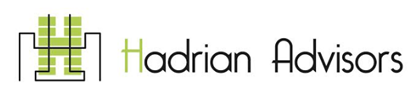 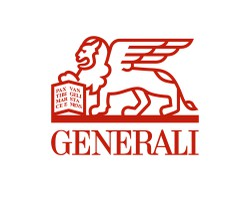


# Life Insurance Usecase

# Ensemble Learning Algorithms in Python <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> and how to Tune The Hyper- Parameters


## Introduction
### Data

Num| Name |	Values
-|--|--|--
1|`Id`|	int
2|	`Product_Info_1`|	real
3|	`Product_Info_2`|	'D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3','A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'
4|	`Product_Info_3`|	integer
5|	`Product_Info_4`|	real
6|	`Product_Info_5`|	integer 2, 3
7|	`Product_Info_6`|	integer 1, 3
8|	`Product_Info_7`|	integer 1, 2, 3
9|	`Ins_Age`|	real
10|	`Ht`|	real
11|	`Wt`|	real  
12|	`BMI`|	real
-|--|--|--
13|	`Medical_Keyword_`|	int 1/0
14|	`Response`|	integer 1 -> 8


## 1 Data Preparation
### 1.1 Lecture  

Load the [data] in the current path (`path=""`) or directly execute the cell.

In [1]:
%matplotlib inline
# Importations 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Performing grid search
from sklearn.model_selection import train_test_split

path=""
TabTrain=pd.read_csv(path+'trainCourseWed_Sat.csv',index_col=0)
TabTest=pd.read_csv(path+'testCourseWed_Sat.csv',index_col=0)
TabTrain.head()

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1,Response
0,0.0,4.514923,0.271576,0.0,2.747143,0.0,3.332864,4.163054,2.518814,2.853852,...,0.0,0.0,0.0,0.0,3.2421,0.0,0.0,0.000000,0.0,0.0
1,0.0,4.514923,0.814729,0.0,2.747143,0.0,1.287698,4.407940,2.332235,2.456277,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,2.581342,0.0,1.0
2,0.0,4.514923,0.271576,0.0,2.747143,0.0,2.120914,3.673283,0.699670,0.769136,...,0.0,0.0,0.0,0.0,3.2421,0.0,0.0,0.000000,0.0,1.0
3,0.0,4.514923,0.814729,0.0,2.747143,0.0,0.681722,4.163054,1.282729,1.289217,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,2.581342,0.0,1.0
4,0.0,4.514923,0.271576,0.0,2.747143,0.0,2.045167,5.142597,1.515953,1.090129,...,0.0,0.0,0.0,0.0,3.2421,0.0,0.0,0.000000,0.0,0.0


In [2]:
X_train2 = TabTrain.drop(['Response'],axis=1).values
X_test2 = TabTest.drop(['Response'],axis=1).values
Y_train = TabTrain['Response'].values
Y_test = TabTest['Response'].values
Labels = TabTrain.columns[:-1].tolist()



## 2 Model Aggregator or Ensemble Methods



The described algorithms are made using adaptive (boosting, gradient boosting) or random (bagging, random forest) enabling to improve the adjustement by a combination or aggregation of a number of models, and avoiding overfitting.

Two types of algorithms are addressed. The ones relying on a random construction of a family of models : *bagging* for *bootstrap aggregation* (Breiman, 1996) and random forests (Breiman, 2001) which offer a improbement on bagging for specific tree models (CART). The ones relying on *boosting* (Freund and Shapiro, 1996) which are made using an *adaptive*, deterministic or random construction of a family of models. These algorithms have been developped at the edge of machine learning and statistics.

The principles of *bagging* or *boosting* can be used for every modeling method. But they especially are used with binary trees as weak learners. We will focus here on a bagging method (**Random Forest**) and two popular boosting methods (**Gradient Boosting** and **XGBoost**). The aim is to succeed to tune their hyperparameters for better accuracy.

In [3]:
def evaluateModel(alg, X_train, Y_train, X_test, Y_test):
    #Fit the algorithm on the data
    alg.fit(X_train, Y_train)
        
    #Predict test set:
    X_test_predictions = alg.predict(X_test)
    X_test_predprob = alg.predict_proba(X_test)[:,1]
    
    print("AUC Score (Test): " + str(metrics.roc_auc_score(Y_test, X_test_predprob)))
    print("Accuracy Test : " + str(metrics.accuracy_score(Y_test, X_test_predictions.round())))

In [4]:
from sklearn.linear_model import LogisticRegression
alg = LogisticRegression()
evaluateModel(alg, X_train2, Y_train, X_test2, Y_test)

AUC Score (Test): 0.774548071262
Accuracy Test : 0.772


#### BAGGING

*Principle* :

Be Y an output variable, discrete or continuous, $X^1,...,X^p$ the explanatory variables and f(x) a model with $x = {x^1,...,x^p} \in \mathbb{R}^p.$ $n$ is the number of examples and 
$$ z = {(x_{1},y_{1}),...,(x_{n},y_{n})} $$
a sample of law $F$

Given $B$ independent samples $(z_{b})_{b=1,B}$, a *bagging prediction* is defined as :

$$\text{- quantitative : } \widehat{f}_{B}(.) = \frac{1}{B} \sum\limits_{b=1}^{B}\widehat{f}_{z_{b}}(.), $$
$$\text{- qualitative : } \widehat{f}_{B}(.) = arg\max_{j} \text{( b | }\widehat{f}_{z_{b}}(.) = j \text{ ).} $$

*First case* : simple *average of the results* of each model for each sample;

*Seconde case* : a group of models is *chosen* to *vote* and select the best classification.

Doing that average on several *independent* models is good to *reduce the variance* of the error.

But here we have to do a *bootstrap* on the training set, which is obtained by sampling with postponement.


Here you can see the general algorithm for **Bagging** :


** ALGORITHM ** :

**for b = 1 to B do**

$\text{ extract bootstrap sample } z_{b}.$
    
$\text{ estimate } \widehat{f}_{z_{b}}(x_{0}) \text{ on bootstrap sample.}$
    
**end for**

Compute the average estimation $\widehat{f}_{B}(x_{0}) = \frac{1}{B}\sum\limits_{b=1}^{B}\widehat{f}_{z_{b}}(x_{0}) $


### 2.1 Random Forest

###############################################

**Random Forest** is considered to be a panacea of all data science problems. On a funny note, when you can’t think of any algorithm (irrespective of situation), use random forest!

Random Forest is a versatile machine learning method capable of performing both regression and classification tasks. It also undertakes dimensional reduction methods, treats missing values, outlier values and other essential steps of data exploration, and does a fairly good job. It is a type of ensemble learning method, where a group of weak models combine to form a powerful model.


** ALGORITHM ** :

**for b = 1 to B do**

$\text{ extract bootstrap sample } z_{b}.$
    
$\text{ estimate a tree on that sample with variable randomization : random selection of m predictors}$
    
**end for**

Compute the average estimation $\widehat{f}_{B}(x_{0}) = \frac{1}{B}\sum\limits_{b=1}^{B}\widehat{f}_{z_{b}}(x_{0}) $



** PYTHON IMPLEMENTATION **

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

**Let's first use a function that fits my model 'alg' and returns the error on a validation set.
It will also perform a cross-validation over the number of trees if allowed, and check the best number.**

In [6]:
def TrainValidationFitAndCV(alg, X_train, Y_train, X_val, Y_val, Labels,performCV=True, cv_folds=10,  printFeatureImportance=True, early_stopping_rounds=50):
    """
    Fits the algorithm to X_train and Y_train, performs cross-validation if performCV=True and print the accuracy.
    
    Arguments:
    alg -- algorithm that fits
    X_train -- training set
    Y_train -- output vector
    Labels -- names of the features
    
    Returns:
    None
    
    """
    
    #Fit the algorithm on the data
    alg.fit(X_train, Y_train)
    
    #Predict training set:
    X_train_predictions = alg.predict(X_train)
    X_train_predprob = alg.predict_proba(X_train)[:,1]
    X_val_predictions = alg.predict(X_val)
    X_val_predprob = alg.predict_proba(X_val)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, X_train, Y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("AUC Score (Train): " + str(metrics.roc_auc_score(Y_train, X_train_predprob)))
    print("AUC Score (Validation): " + str(metrics.roc_auc_score(Y_val, X_val_predprob)))
    print("Accuracy Validation : " + str(metrics.accuracy_score(Y_val, X_val_predictions.round())))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" %(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        pd.DataFrame(np.vstack(cv_score), columns=['RF']).boxplot(return_type='dict')
        plt.show()
    

** As we are about to see, we don't want our training to be overfitted. So what we do is at each different tuning, we split out training set into X_Learn and X_val, and we train on X_learn in order to validate our tuning on different samples.**

**In the slides, we were talking about using a validation set that has the same distribution as the test; we don't do this here, but we are sort of bootstrapping on different validation sets.**


**We test it on a sample of X_train2, Y_train, named X_learn, Y_learn :**


Model Report
AUC Score (Train): 0.999627834671
AUC Score (Validation): 0.767581728616
Accuracy Validation : 0.795768169273
CV Score : Mean - 0.7723132 | Std - 0.03276606 | Min - 0.7298182 | Max - 0.8388811


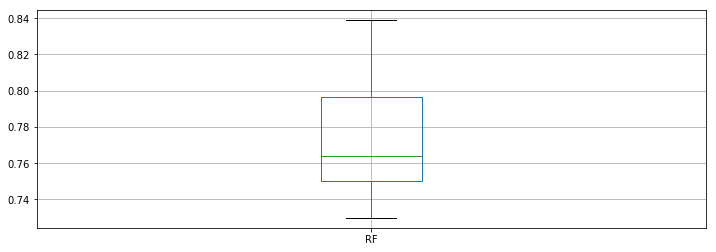

In [7]:
X_learn,X_val,Y_learn,Y_val=train_test_split(X_train2,Y_train,test_size=int(0.2*len(X_train2)))

predictors = Labels
rf0 = RandomForestClassifier(random_state=10)
TrainValidationFitAndCV(rf0, X_learn, Y_learn, X_val, Y_val, predictors)

Ok, the boxplot there is useful to get the variance and the mean of the Out-of-bag error! Our goal would be to reduce that box and to move it up.

**We are going to tune the main parameters of the random forest, and to avoid overfitting, we are going to do our tuning on 80% of the training set each time. **

** So we do some bootstrapping in order to have a better generalization.**

### a) Let's find the optimal number of estimators first, between 20 and 300.

First you can get a large scale with a large step

In [8]:
X_learn,X_val,Y_learn,Y_val=train_test_split(X_train2,Y_train,test_size=int(0.2*len(X_train2)))

param_test1 = {'n_estimators':list(range(20,301,20))}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=-2,iid=False, cv=5)
gsearch1.fit(X_learn,Y_learn)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=500, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=10,
            verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=-2,
       param_grid={'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [9]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 140}, 0.796468447297811)

In [10]:
n_estimatorsOpt = gsearch1.best_params_['n_estimators']

Now that we have a good number of estimators, let's move on to the tree-specific parameters.

### b) Tuning tree-specific parameters (maximum depth of a tree, min_samples_split, min_sample_leaf)

**First and foremost, you can tune the maximum depth of a tree, the most important parameter, along with the minimum numbre of samples at a split.**

The first one has to be of course at a large range but not too complex (less than the third of the number of features). The second one is the minimum number of samples required to split an internal node, so it avoids fuzzy nodes.

In [11]:
X_learn,X_val,Y_learn,Y_val=train_test_split(X_train2,Y_train,test_size=int(0.2*len(X_train2)))

param_test2 = {'max_depth':list(range(2,40,10)), 'min_samples_split':list(range(2,60,20))}
gsearch2= GridSearchCV(RandomForestClassifier(n_estimators=n_estimatorsOpt,min_samples_leaf=50,max_features='sqrt',oob_score=True),
        param_grid = param_test2, scoring='roc_auc', n_jobs=-2,iid=False,cv=5)
gsearch2.fit(X_learn, Y_learn);

In [12]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 32, 'min_samples_split': 2}, 0.8105330582135849)

In [13]:
maxDepthOpt = gsearch2.best_params_['max_depth']
min_samples_splitOpt = gsearch2.best_params_['min_samples_split']

**Let's test for 7 values of min_samples_leaf, from 5 to 75 in steps of 10.**

It is very useful, it the minimum number of samples required to be at a leaf node, so it avoids fuzzy overfitting.

In [14]:
X_learn,X_val,Y_learn,Y_val=train_test_split(X_train2,Y_train,test_size=int(0.2*len(X_train2)))

param_test3 = {'min_samples_leaf':list(range(5,76,10))}
gsearch3= GridSearchCV(RandomForestClassifier(n_estimators=n_estimatorsOpt,max_depth=maxDepthOpt,
                                              min_samples_split=min_samples_splitOpt,max_features='sqrt',
                                              random_state=10,oob_score=True),
        param_grid = param_test3, scoring='roc_auc', n_jobs=-2,iid=False,cv=5)
gsearch3.fit(X_learn, Y_learn);

In [15]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 5}, 0.8151091983285532)

As you see, maybe we could reduce our scale for the min_samples_leaf :

In [ ]:
param_test3 = {'min_samples_leaf':list(range(1,20,5))}
gsearch3= GridSearchCV(RandomForestClassifier(n_estimators=n_estimatorsOpt,max_depth=maxDepthOpt,
                                              min_samples_split=min_samples_splitOpt,max_features='sqrt',random_state=10,oob_score=True),
        param_grid = param_test3, scoring='roc_auc', n_jobs=-2,iid=False,cv=5)
gsearch3.fit(X_learn, Y_learn);


In [16]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 5}, 0.8151091983285532)

In [17]:
min_samples_leafOpt = gsearch3.best_params_['min_samples_leaf']

**Let's see the new AUC and accuracy score on the random validation set :**


Model Report
AUC Score (Train): 0.983398954168
AUC Score (Validation): 0.835610821411
Accuracy Validation : 0.823367065317
CV Score : Mean - 0.8164937 | Std - 0.02324328 | Min - 0.7810629 | Max - 0.8561958


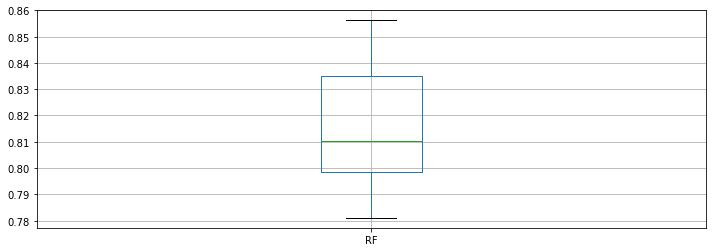

In [18]:
TrainValidationFitAndCV(gsearch3.best_estimator_, X_learn, Y_learn, X_val, Y_val, predictors)

### c) Now let's tune the last Forest-parameter, i.e. max_features by trying 5 values from 7 to 101 in steps of 20.

Here, the last parameter would be the maximum number of features, as, depending on the maximum depth of a tree, the algorithm would use the same feature more than once to get a tree :
- if max_features is low and max_depth is high, it will use the same features many times and split on it too much
- if max_features is high and max_depth is low, it will choose the dimensions more randomly.

**Exercice ** :

Let's do some gridsearching on the max_features parameter. You have to use the previous optimized parameters to do so.

In [19]:
X_learn,X_val,Y_learn,Y_val=train_test_split(X_train2,Y_train,test_size=int(0.2*len(X_train2)))

param_test4 = None
gsearch4 = None
#################### ENTER YOUR CODE HERE ###################
param_test4 = {'max_features':list(range(7,101,20))}
gsearch4 = GridSearchCV(RandomForestClassifier(n_estimators=n_estimatorsOpt,max_depth=maxDepthOpt,
                                               min_samples_split=min_samples_splitOpt,min_samples_leaf=min_samples_leafOpt,oob_score=True),
        param_grid = param_test4, scoring='roc_auc', n_jobs=-2,iid=False,cv=5)
gsearch4.fit(X_learn,Y_learn);
################### END OF YOUR CODE #######################
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.81713, std: 0.01164, params: {'max_features': 7},
  mean: 0.81500, std: 0.01385, params: {'max_features': 27},
  mean: 0.81120, std: 0.01462, params: {'max_features': 47},
  mean: 0.80797, std: 0.01769, params: {'max_features': 67},
  mean: 0.80908, std: 0.01863, params: {'max_features': 87}],
 {'max_features': 7},
 0.8171327577246743)

In [20]:
max_featuresOpt = gsearch4.best_params_['max_features']

### d) Now that the parameters are tuned, let's Increase the number of estimators for a fixed validation set, then compute the model

In [21]:
X_learn,X_val,Y_learn,Y_val=train_test_split(X_train2,Y_train,test_size=int(0.2*len(X_train2)))


Here, I am going to use an attribute of the RandomForestClassifier class in sklearn, which is **warm_start**. The good thing about it is that when you assign it to True, it enables you to reuse the solution of the previous call to fit and add more estimators to the ensemble.

**Let's try the model on 500 estimators on a randomly bagged validation set :**


Model Report
AUC Score (Train): 0.973824092908
AUC Score (Validation): 0.802709059233
Accuracy Validation : 0.796688132475
CV Score : Mean - 0.8263899 | Std - 0.0285899 | Min - 0.776749 | Max - 0.8778916


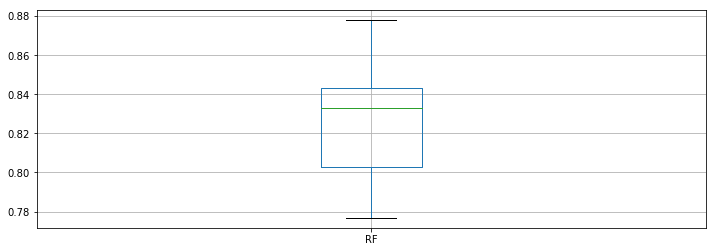

In [22]:
rf_tuned_1 = RandomForestClassifier(n_estimators=500,max_depth=maxDepthOpt,min_samples_split=min_samples_splitOpt,
                                    min_samples_leaf=min_samples_leafOpt,max_features=max_featuresOpt,warm_start=True)
TrainValidationFitAndCV(rf_tuned_1, X_learn, Y_learn, X_val, Y_val, predictors, performCV=True)

You can see it is obviously better, we could add some other estimators (trees).


Model Report
AUC Score (Train): 0.972282380876
AUC Score (Validation): 0.798523519164
Accuracy Validation : 0.79392824287
CV Score : Mean - 0.823932 | Std - 0.027831 | Min - 0.7748354 | Max - 0.8695053


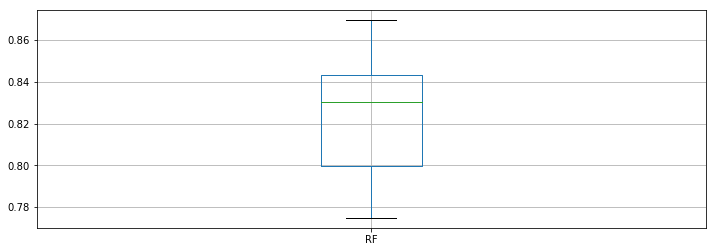

In [25]:
rf_tuned_2 = RandomForestClassifier(n_estimators=150,max_depth=maxDepthOpt,min_samples_split=min_samples_splitOpt,
                                    min_samples_leaf=min_samples_leafOpt,max_features=max_featuresOpt,warm_start=True)
TrainValidationFitAndCV(rf_tuned_2, X_learn, Y_learn, X_val, Y_val, predictors, performCV=True)

On the real dataset, using the X_train2 and predicting on X_test2, we are obtaining this :

In [26]:
evaluateModel(rf_tuned_2, X_train2, Y_train, X_test2, Y_test)

C:\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:303: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


AUC Score (Test): 0.773566802591
Accuracy Test : 0.81


*NB : I didn't use the attribute 'class_weights' of the RandomForestClassifier class, which would be very useful to get better results.*

Now, let's take a look at an other really used type of ensemble learning : **the Boosting**.

#### BOOSTING

*Principle* :

The term ‘Boosting’ refers to a family of algorithms which converts weak learner to strong learners.

The *boosting* method has the same general principle as the *bagging* method, but here, each model is an adaptive version of the previous one, giving more weights to the wrongly predicted examples.

### 2.2 Gradient Boosting

###################################
** ADDITIVE STEPWISE BOOSTING **



Now we know that, boosting combines weak learner a.k.a. base learner to form a strong rule. An immediate question which should pop in your mind is, ‘How boosting identify weak rules?‘

To find weak rule, we apply base learning (ML) algorithms with a different distribution. Each time base learning algorithm is applied, it generates a new weak prediction rule. This is an iterative process. After many iterations, the boosting algorithm combines these weak rules into a single strong prediction rule.

In [27]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


** Exercice ** :

Let's define a function which will help us create *GBM models* and perform *cross-validation*, the same way as we did for the Random Forest.

In [28]:
def GBMFitAndCV(alg, X_train, Y_train, X_val, Y_val, Labels,performCV=True, cv_folds=10):
    """
    Fits the algorithm to X_train and Y_train, performs cross-validation with ROC-AUC if performCV=True and print the accuracy.
    
    Arguments:
    alg -- algorithm that fits
    X_train -- training set
    Y_train -- output vector
    Labels -- names of the features
    
    Returns:
    None
    
    """
    
    #Fit the algorithm on the data
    alg.fit(X_train, Y_train)
        
    #Predict training set:
    X_train_predictions = alg.predict(X_train)
    X_train_predprob = alg.predict_proba(X_train)[:,1]
    X_val_predictions = alg.predict(X_val)
    X_val_predprob = alg.predict_proba(X_val)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, X_train, Y_train, cv=cv_folds, scoring='roc_auc')
        
    #Print model report:
    print("\nModel Report")
    print("AUC Score (Train): " + str(metrics.roc_auc_score(Y_train, X_train_predprob)))
    print("AUC Score (Validation): " + str(metrics.roc_auc_score(Y_val, X_val_predprob)))
    print("Accuracy Validation : " + str(metrics.accuracy_score(Y_val, X_val_predictions.round())))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" %(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        pd.DataFrame(np.vstack(cv_score), columns=['GBM']).boxplot(return_type='dict')
        plt.show()

**Let's start by creating a *baseline model*, ie without any tuning :**


Model Report
AUC Score (Train): 0.903350964827
AUC Score (Validation): 0.817743701597
Accuracy Validation : 0.829806807728
CV Score : Mean - 0.8199952 | Std - 0.02099996 | Min - 0.7819576 | Max - 0.851478


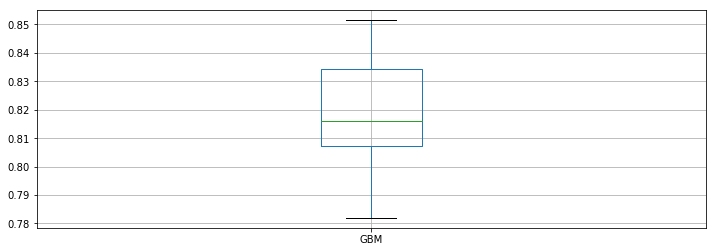

In [29]:
X_learn,X_val,Y_learn,Y_val=train_test_split(X_train2,Y_train,test_size=int(0.2*len(X_train2)))

#Choose all predictors
predictors = Labels
gbm0 = GradientBoostingClassifier(random_state=10)
GBMFitAndCV(gbm0, X_learn, Y_learn, X_val, Y_val, predictors)

### a) Fix learning rate and number of estimators for tuning tree-based parameters
Let's take the default *learning rate* of 0.1 here and check the optimum number of trees for that. For this purpose, we can do a *grid search* and test out values from 20 to 201 in steps of 20.

In [30]:
def GridN_Estimators(alg,X_train,Y_train,param):
    

    gsearch1 = GridSearchCV(alg,param_grid = param, scoring='accuracy',n_jobs=-2,iid=False, cv=5)
    gsearch1.fit(X_train,Y_train);
    print(gsearch1.best_params_, gsearch1.best_score_)
    
    return gsearch1.best_params_['n_estimators'], gsearch1


In [31]:
#Choose all predictors
param_test1 = {'n_estimators':list(range(20,201,20))}
alg = GradientBoostingClassifier(learning_rate=0.1,
                                max_features='sqrt', subsample=0.8, random_state=10)

n_estimatorsOpt, _ = GridN_Estimators(alg,X_train2,Y_train,param_test1)

({'n_estimators': 200}, 0.8267761132111298)


### b) Tuning tree-specific parameters

**Now let's move onto tuning the tree parameters.**

**Tune *max_depth and min_samples_split* **

**Tune *min_samples_leaf* **

**Tune *max_features* **

**Exercice ** :

Tune the min_samples_split parameter and the max_depth parameter

In [32]:
def GridMaxDepth_MinSamplesSplit(alg,X_train,Y_train,param):
    
    gsearch2 = None
    ############ ENTER YOUR CODE HERE ####################
    gsearch2 = GridSearchCV(alg,param_grid = param, scoring='accuracy',n_jobs=-2,iid=False, cv=5)
    gsearch2.fit(X_train,Y_train);
    ############ END OF YOUR CODE ##################
    print(gsearch2.best_params_, gsearch2.best_score_)
    
    return gsearch2.best_params_['max_depth'], gsearch2.best_params_['min_samples_split'], gsearch2


**You will have to choose good scales.**

In [33]:
param_test2 = None
####################### CODE #######################
param_test2 = {'max_depth':list(range(7,40,10)), 'min_samples_split':list(range(5,60,20))}
####################### END OF THE CODE ############
alg = GradientBoostingClassifier(learning_rate=0.1, n_estimators=n_estimatorsOpt,
                                max_features='sqrt', subsample=0.8, random_state=10)

max_depthOpt, min_samples_splitOpt, _ = GridMaxDepth_MinSamplesSplit(alg,X_train2,Y_train,param_test2)


({'min_samples_split': 5, 'max_depth': 37}, 0.8262195717810569)


Let's test for 5 values of *min_samples_leaf*, from 5 to 70 in steps of 10.

In [34]:
def GridMaxDepth_MinSamplesLeaf(alg,X_train,Y_train,param):
    

    gsearch3 = GridSearchCV(alg,param_grid = param, scoring='accuracy',n_jobs=-2,iid=False, cv=5)
    gsearch3.fit(X_train,Y_train);
    print(gsearch3.best_params_, gsearch3.best_score_)
    
    return gsearch3.best_params_['min_samples_leaf'], gsearch3



In [36]:
param_test3 = {'min_samples_leaf':list(range(5,71,10))}
alg = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=min_samples_splitOpt,
                                    n_estimators=n_estimatorsOpt,max_depth=max_depthOpt,
                                    max_features='sqrt', subsample=0.8, random_state=10)

min_samples_leafOpt, gsearch3 = GridMaxDepth_MinSamplesLeaf(alg,X_train2,Y_train,param_test3)

({'min_samples_leaf': 5}, 0.8245678614423511)


Let’s fit the model again on a sample of X_train2.


Model Report
AUC Score (Train): 1.0
AUC Score (Validation): 0.807741528916
Accuracy Validation : 0.839006439742
CV Score : Mean - 0.8175601 | Std - 0.02316972 | Min - 0.7735668 | Max - 0.8613381


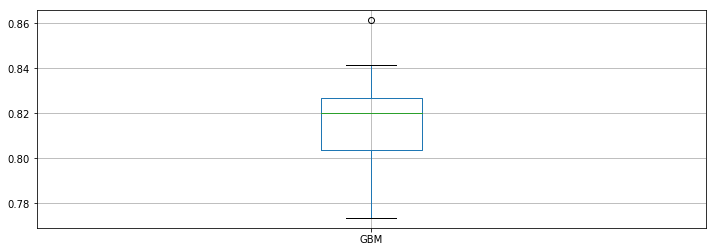

In [37]:
X_learn,X_val,Y_learn,Y_val=train_test_split(X_train2,Y_train,test_size=int(0.2*len(X_train2)))
GBMFitAndCV(gsearch3.best_estimator_, X_learn, Y_learn, X_val, Y_val, predictors)

Now let's tune the last tree-parameters, i.e. max_features by trying 9 values from 5 to 50 in steps of 5.

In [38]:
def GridMaxFeatures(alg,X_train,Y_train,param):
    

    gsearch4 = GridSearchCV(alg,param_grid = param, scoring='accuracy',n_jobs=-2,iid=False, cv=5)
    gsearch4.fit(X_train,Y_train);
    print(gsearch4.best_params_, gsearch4.best_score_)
    
    return gsearch4.best_params_['max_features'], gsearch4

In [39]:

param_test4 = {'max_features':list(range(5,51,5))}
alg = GradientBoostingClassifier(learning_rate=0.1,n_estimators=n_estimatorsOpt,max_depth=max_depthOpt,
                                       min_samples_split=min_samples_splitOpt,min_samples_leaf=min_samples_leafOpt,
                                       subsample=0.8, random_state=10)

max_featuresOpt, gsearch4 = GridMaxFeatures(alg,X_train2,Y_train,param_test4)

({'max_features': 5}, 0.8269580771419929)


### c) Tuning subsample and making models with lower *learning rate*
The next step would be try different *subsample* values. Let's get a logarithmic scale of 20 values between 0.5 and 0.9.

In [40]:
def GridSubSample(alg,X_train,Y_train,param):
    
    gsearch5 = GridSearchCV(alg,param_grid = param, scoring='accuracy',n_jobs=-2,iid=False, cv=5)
    gsearch5.fit(X_train,Y_train);
    print(gsearch5.best_params_, gsearch5.best_score_)
    
    return gsearch5.best_params_['subsample'], gsearch5

** Exercice **

Choose a good scale for your subsample (10 values). We want it to be over 0.5 and to be the most logarithmic possible.

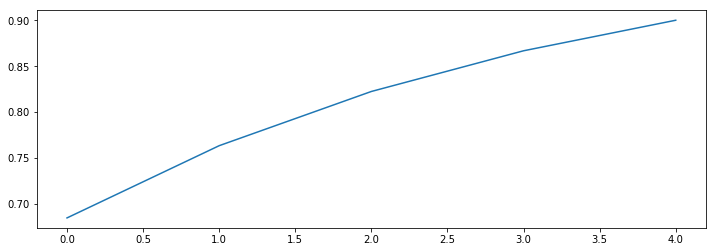

In [41]:
subsamples = None
################# YOUR CODE ###################
thresholds = np.arange(0.1,0.5,0.4/10)
r0 = np.log(thresholds[0]) / np.log(20)
r1 = np.log(thresholds[-1]) / np.log(20)
subsamples = 20 ** (np.arange(r0,r1,(r1-r0)/10))
subsamples = np.sort(1-subsamples)
################ END OF THE CODE ##############
plt.plot(subsamples)

In [42]:
param_test5 = {'subsample':subsamples.tolist()}


alg = GradientBoostingClassifier(learning_rate=0.1,n_estimators=n_estimatorsOpt,max_depth=max_depthOpt,
                                        min_samples_split=min_samples_splitOpt,min_samples_leaf=min_samples_leafOpt,
                                        max_features=max_featuresOpt, random_state=10)

subsampleOpt, gsearch5 = GridSubSample(alg,X_train2,Y_train,param_test5)


({'subsample': 0.8667553261625504}, 0.8243843773770252)


We now look at the tuned model and see the results on a sample set.

In [43]:
X_learn,X_val,Y_learn,Y_val=train_test_split(X_train2,Y_train,test_size=int(0.2*len(X_train2)))


Model Report
AUC Score (Train): 1.0
AUC Score (Validation): 0.823960213598
Accuracy Validation : 0.85004599816
CV Score : Mean - 0.8203442 | Std - 0.01664379 | Min - 0.7872818 | Max - 0.854268


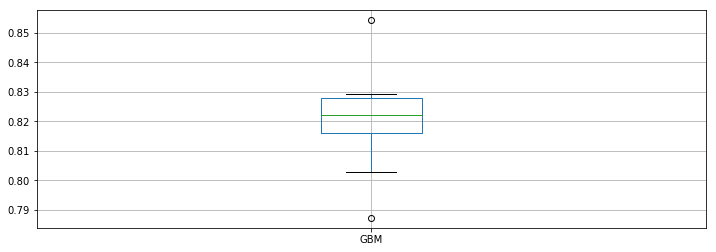

In [45]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05,n_estimators=500,max_depth=max_depthOpt,
                                                   min_samples_split=min_samples_splitOpt,min_samples_leaf=min_samples_leafOpt,
                                                   max_features=max_featuresOpt, subsample=subsampleOpt, random_state=10, warm_start=True)
GBMFitAndCV(gbm_tuned_1, X_learn, Y_learn, X_val, Y_val, predictors)

In [46]:
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000, max_depth=max_depthOpt,
                                                   min_samples_split=min_samples_splitOpt,min_samples_leaf=min_samples_leafOpt,
                                                   max_features=max_featuresOpt, subsample=subsampleOpt, random_state=10, warm_start=True)
GBMFitAndCV(gbm_tuned_2, X_learn, Y_learn, X_val, Y_val, predictors, performCV=False)


Model Report
AUC Score (Train): 1.0
AUC Score (Validation): 0.826978038508
Accuracy Validation : 0.852805887764


We can see that the *AUC score* has increased. Then we can choose our *learning_rate* of 0.005 and learn on *X_learn* and get the performance.

In [47]:
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200,max_depth=max_depthOpt,
                                                   min_samples_split=min_samples_splitOpt,min_samples_leaf=min_samples_leafOpt,
                                                   max_features=max_featuresOpt, subsample=subsampleOpt, random_state=10, warm_start=True)
GBMFitAndCV(gbm_tuned_3, X_learn, Y_learn, X_val, Y_val, predictors, performCV=False)


Model Report
AUC Score (Train): 1.0
AUC Score (Validation): 0.826493870337
Accuracy Validation : 0.849126034959


In [48]:
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000,max_depth=max_depthOpt,
                                                   min_samples_split=min_samples_splitOpt,min_samples_leaf=min_samples_leafOpt,
                                                   max_features=max_featuresOpt, subsample=subsampleOpt, random_state=10, warm_start=True)
evaluateModel(gbm_tuned_3, X_train2, Y_train, X_test2, Y_test)

AUC Score (Test): 0.792123683465
Accuracy Test : 0.814


## 2.3 XGBoost


** Installation **:
For Windows users, and Python 2.7  or Python 3.4 :

Go to :
http://www.picnet.com.au/blogs/guido/post/2016/09/22/xgboost-windows-x64-binaries-for-download/

I am placing xgboost in a directory called xgboost_install_dir but this can be anything.

- git clone https://github.com/dmlc/xgboost.git xgboost_install_dir

- copy libxgboost.dll (downloaded from this page) into the xgboost_install_dir\python-package\xgboost\ directory

- cd xgboost_install_dir\python-package\

- rename libxgboost.dll with xgboost.dll

then run :

python setup.py install

** OTHER WAY TO DO THIS ** : run that command :

conda install -c anaconda py-xgboost

In [49]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from matplotlib.pylab import rcParams
from sklearn.metrics import f1_score

Before proceeding further, lets define a function which will help us create *XGBoost models* and perform cross-validation. The best part is that you can take this function as it is and use it later for your own models.

### a) Fix learning rate and *number of estimators* for tuning tree-based parameters

In [50]:
def xg_f1(y, t):
    t = t.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y] # binaryzing your output
    return "f1", f1_score(t, y_bin)

**Exercice : **

Complete the following function, that fits and validates your model on sample, and that cross-validates using "xgb.cv" over the number of estimators to find the best one. It puts the results of the cross-validation into "cvresults".

In [248]:
def XGBFitAndCV(alg, X_train, Y_train, X_val, Y_val, predictors,useTrainCV=True, cv_folds=10, early_stopping_rounds=50):
    
    cvresult = None
    if useTrainCV:
    ################### ENTER YOUR CODE OF CROSS VALIDATION HERE #####################
        
    ################### END OF THE CODE ###################################
        print('CV has runned')
    
    #Fit the algorithm on the data
    alg.fit(X_train, Y_train, eval_metric='auc')
    
    #Predict training set:
    X_train_predictions = alg.predict(X_train)
    X_train_predprob = alg.predict_proba(X_train)[:,1]
    X_val_predictions = alg.predict(X_val)
    X_val_predprob = alg.predict_proba(X_val)[:,1]
    
    #Perform cross-validation:
    if useTrainCV:
        cv_score = cross_validation.cross_val_score(alg, X_train, Y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("Model Report")
    print("AUC Score (Train): %f" % metrics.roc_auc_score(Y_learn, X_train_predprob))
    print("AUC Score (Validation): %f" % metrics.roc_auc_score(Y_val, X_val_predprob))
    print("Accuracy Validation : %.4g" % metrics.accuracy_score(Y_val, X_val_predictions.round()))
    print("Best number of estimators: %f" % alg.get_params()['n_estimators'])

    if useTrainCV:
        print("CV Score : Mean - "+str(cvresult['test-auc-mean'].iloc[-1].mean()) \
              + " | Std - " +str(cvresult['test-auc-std'].iloc[-1].mean()))
        pd.DataFrame(cvresult[['test-auc-mean']].values, columns=['XGBoost']).boxplot(return_type='dict')
        plt.show()
    
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')
    return alg.get_params()['n_estimators']

Lets take the default *learning rate* of 0.1 here and check the optimum *number of trees* using cv function of xgboost.

In [ ]:
X_learn,X_val,Y_learn,Y_val=train_test_split(X_train2,Y_train,test_size=int(0.2*len(X_train2)))

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 scale_pos_weight=1,
    nthread =-2 )
n_estimatorsOpt = XGBFitAndCV(xgb1, X_learn, Y_learn, X_val, Y_val, Labels)

I have my optimal number of estimators for that based model. Let's look at the tree parameters :

### b) Tune *max_depth* and *min_child_weight*
They will have the highest impact on model outcome.
We first set wider ranges.

PS : It could take several minutes to process.

In [ ]:
def GridMaxDepth_MinChildWeight(alg,X_train,Y_train,param):
    
    gsearch1 = GridSearchCV(alg,param_grid = param, scoring='roc_auc', iid=False, cv=5)
    gsearch1.fit(X_train,Y_train);
    print(gsearch1.best_params_, gsearch1.best_score_)
    
    return gsearch1.best_params_['max_depth'], gsearch1.best_params_['min_child_weight'], gsearch1

In [ ]:
X_learn,X_val,Y_learn,Y_val=train_test_split(X_train2,Y_train,test_size=int(0.2*len(X_train2)))

param_test1 = {
 'max_depth':list(range(2,20,3)),
 'min_child_weight':list(range(1,25,2))
}

alg = XGBClassifier( learning_rate =0.1, n_estimators=n_estimatorsOpt, max_depth=5,
                 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                 objective= 'binary:logistic', scale_pos_weight=1, nthread=-2)
max_depthOpt, min_child_weightOpt, gsearch1 = GridMaxDepth_MinChildWeight(alg,X_learn,Y_learn,param_test1)

We now want to find the optimal gamma for our subset, we'll have to get an exponential scale :

In [ ]:
def GridGamma(alg,X_train,Y_train,param):
    
    gsearch2 = GridSearchCV(alg,param_grid = param, scoring='roc_auc', iid=False, cv=5)
    gsearch2.fit(X_train,Y_train);
    print(gsearch2.best_params_, gsearch2.best_score_)
    
    return gsearch2.best_params_['gamma'], gsearch2

** Exercice ** :

Get a proper scale for the *gamma*. We want it to be closer to 0 than to 1 (it is the minimum loss required to make a split).

In [ ]:
############### CODE ########################

#############################################

In [ ]:
X_learn,X_val,Y_learn,Y_val=train_test_split(X_train2,Y_train,test_size=int(0.2*len(X_train2)))

param_test3 = {
 'gamma':gamma
}
alg = XGBClassifier( learning_rate =0.1, n_estimators=n_estimatorsOpt, max_depth=max_depthOpt,
                         min_child_weight=min_child_weightOpt, gamma=0, subsample=0.8, colsample_bytree=0.8,
                         objective= 'binary:logistic',scale_pos_weight=1, nthread=-2)

gammaOpt, gsearch2 = GridGamma(alg,X_learn,Y_learn,param_test3)

We have a satisfying gamma, now we are going to plot a boxplot of our model accuracy with our new tuned parameters

In [ ]:
X_learn,X_val,Y_learn,Y_val=train_test_split(X_train2,Y_train,test_size=int(0.2*len(X_train2)))

xgb2 = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=max_depthOpt,
 min_child_weight=min_child_weightOpt,
 gamma=gammaOpt,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 scale_pos_weight=1,
nthread=-2)
n_estimatorsOpt = XGBFitAndCV(xgb2, X_learn, Y_learn, X_val, Y_val, Labels);

We have to keep on tuning on tree parameters; Here we want the subsample and the colsample_bytree to be optimal to avoid overfitting on trining sets.

In [ ]:
def GridSubSample_ColSample(alg,X_train,Y_train,param):
    
    gsearch4 = GridSearchCV(alg,param_grid = param, scoring='roc_auc', iid=False, cv=5)
    gsearch4.fit(X_train,Y_train);
    print(gsearch4.best_params_, gsearch4.best_score_)
    
    return gsearch4.best_params_['subsample'], gsearch4.best_params_['colsample_bytree'], gsearch4

In [ ]:
thresholds = np.arange(0.1,0.5,0.4/5)
r0 = np.log(thresholds[0]) / np.log(20)
r1 = np.log(thresholds[-1]) / np.log(20)
subsample = 20 ** (np.arange(r0,r1,(r1-r0)/5))
subsample = np.sort(1-subsample)


In [ ]:
thresholds = np.arange(0.1,0.5,0.4/5)
r0 = np.log(thresholds[0]) / np.log(20)
r1 = np.log(thresholds[-1]) / np.log(20)
colsample_bytree = 20 ** (np.arange(r0,r1,(r1-r0)/5))
colsample_bytree = np.sort(1-colsample_bytree)


In [ ]:
X_learn,X_val,Y_learn,Y_val=train_test_split(X_train2,Y_train,test_size=int(0.2*len(X_train2)))

param_test4 = {
 'subsample':subsample,
 'colsample_bytree':colsample_bytree
}

alg = XGBClassifier( learning_rate =0.1, n_estimators=n_estimatorsOpt, max_depth=max_depthOpt,
                     min_child_weight=min_child_weightOpt, gamma=gammaOpt, subsample=0.8, colsample_bytree=0.8,
                     objective= 'binary:logistic',scale_pos_weight=1, nthread=-2)


subsampleOpt, colsample_bytreeOpt, gsearch4 = GridSubSample_ColSample(alg,X_learn,Y_learn,param_test4)


**Exercice : **

Get a better estimation of the good parameters, by reducing the scales :


In [ ]:

param_test4 = {
 'subsample':subsample,
 'colsample_bytree':colsample_bytree
}
########## YOUR CODE ##############

##### END OF YOUR CODE ############

subsampleOpt, colsample_bytreeOpt, gsearch5 = GridSubSample_ColSample(alg,X_learn,Y_learn,param_test4)


colsample_bytreeOpt = gsearch5.best_params_['colsample_bytree']
subsampleOpt = gsearch5.best_params_['subsample']

### d) Regularization constraint

Last, we can tune the L1-regularization constraint; this one is very important for the generalization of the model. Of course we want some kind of an exponential scale here, over 0.

In [ ]:
def GridRegAlpha(alg,X_train,Y_train,param):
    
    gsearch6 = GridSearchCV(alg,param_grid = param, scoring='roc_auc', iid=False, cv=5)
    gsearch6.fit(X_train,Y_train);
    print(gsearch6.best_params_, gsearch6.best_score_)
    
    return gsearch6.best_params_['reg_alpha'], gsearch6

In [ ]:
reg_alpha = [1e-5, 1e-4, 1e-3, 1e-2, .5]

In [ ]:
X_learn,X_val,Y_learn,Y_val=train_test_split(X_train2,Y_train,test_size=int(0.2*len(X_train2)))

param_test6 = {
'reg_alpha':reg_alpha
}
alg = XGBClassifier( learning_rate =0.1,n_estimators=n_estimatorsOpt, max_depth=max_depthOpt,
                         min_child_weight=min_child_weightOpt, gamma=gammaOpt,
                        subsample=subsampleOpt, colsample_bytree=colsample_bytreeOpt,
                         objective= 'binary:logistic',scale_pos_weight=1, nthread=-2)

reg_alphaOpt, gsearch6 = GridRegAlpha(alg,X_learn,Y_learn,param_test6)


### e) Learning rate scaling and prediction

Now that we have tuned the most important parameters, we can decrease the learning_rate in order not to shrink too much our weak learners, as it would penalize more the trees and would not be good to fit the data.

** Exercice **

1) Choose yourself a way to tune the *learning_rate*. At the same time add some more *estimators*.

2) Validate your model using the whole dataset X_train2 for training and test on X_test2 (you can use the evaluateModel function.

In [ ]:
X_learn,X_val,Y_learn,Y_val=train_test_split(X_train2,Y_train,test_size=int(0.2*len(X_train2)))

In [ ]:
xgbFinal = None
evaluateModel(xgbFinal, X_train2, Y_train, X_test2, Y_test)